<a href="https://colab.research.google.com/github/kayiwa/SBU_Data_Mining/blob/main/francis_kayiwa_assignment2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#import the useful libraries. (yank and paste from tutorial)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# this is dangerous but will do
data= pd.read_csv("https://raw.githubusercontent.com/kayiwa/SBU_Data_Mining/main/Week%202/Assignment%202.1/malware.csv")
# print the result
data

,Unnamed: 0,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times,type
0,0,AntiVirus,36.0,6.0,3.0,3911.0,0.0,0.0,39.0,33.0,5100.0,4140.0,NaN,3.0,benign
1,1,AntiVirus,117.0,0.0,9.0,23514.0,0.0,0.0,128.0,107.0,26248.0,NaN,NaN,11.0,benign
2,2,AntiVirus,196.0,0.0,6.0,24151.0,0.0,0.0,205.0,214.0,163887.0,24867.0,205.0,9.0,benign
3,3,AntiVirus,6.0,0.0,1.0,889.0,0.0,0.0,7.0,6.0,819.0,975.0,7.0,1.0,benign
4,4,AntiVirus,6.0,0.0,1.0,882.0,0.0,0.0,7.0,6.0,819.0,968.0,7.0,1.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,7840,Zsone,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,257.0,143.0,2.0,2.0,malicious
7841,7841,Zsone,4.0,4.0,1.0,296.0,NaN,0.0,5.0,1.0,86.0,382.0,5.0,1.0,malicious
7842,7842,Zsone,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,257.0,143.0,2.0,2.0,malicious
7843,7843,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,143.0,2.0,2.0,malicious


In [50]:
# print the head
data.head(10)

,name,tcp_packets,dist_port_tcp,external_ips,volume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times,type
0,AntiVirus,36.0,6.0,3.0,3911.0,0.0,0.0,39.0,33.0,5100.0,4140.0,3.0,benign
2,AntiVirus,196.0,0.0,6.0,24151.0,0.0,0.0,205.0,214.0,163887.0,24867.0,9.0,benign
3,AntiVirus,6.0,0.0,1.0,889.0,0.0,0.0,7.0,6.0,819.0,975.0,1.0,benign
4,AntiVirus,6.0,0.0,1.0,882.0,0.0,0.0,7.0,6.0,819.0,968.0,1.0,benign
5,AntiVirus,54.0,54.0,3.0,5062.0,0.0,0.0,63.0,54.0,5457.0,5719.0,9.0,benign
6,AntiVirus,6.0,0.0,1.0,889.0,0.0,0.0,7.0,6.0,819.0,975.0,1.0,benign
7,AntiVirus,6.0,0.0,1.0,1154.0,0.0,0.0,7.0,6.0,593.0,1228.0,1.0,benign
8,AntiVirus,6.0,0.0,1.0,888.0,0.0,0.0,7.0,6.0,819.0,974.0,1.0,benign
10,AntiVirus,226.0,0.0,10.0,34063.0,0.0,0.0,240.0,249.0,187514.0,35139.0,14.0,benign
12,AntiVirus,6.0,0.0,1.0,1308.0,0.0,0.0,7.0,7.0,1947.0,1383.0,1.0,benign


In [28]:
# drop unnamed
data.drop(data.filter(regex="Unnamed"),axis=1, inplace=True)


In [53]:
# rename vulume
data = data.rename(columns={'vulume_bytes': 'volume_bytes'})

In [54]:
data.head(10)

,Unnamed: 0,name,tcp_packets,dist_port_tcp,external_ips,volume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times,type
0,0,AntiVirus,36.0,6.0,3.0,3911.0,0.0,0.0,39.0,33.0,5100.0,4140.0,NaN,3.0,benign
1,1,AntiVirus,117.0,0.0,9.0,23514.0,0.0,0.0,128.0,107.0,26248.0,NaN,NaN,11.0,benign
2,2,AntiVirus,196.0,0.0,6.0,24151.0,0.0,0.0,205.0,214.0,163887.0,24867.0,205.0,9.0,benign
3,3,AntiVirus,6.0,0.0,1.0,889.0,0.0,0.0,7.0,6.0,819.0,975.0,7.0,1.0,benign
4,4,AntiVirus,6.0,0.0,1.0,882.0,0.0,0.0,7.0,6.0,819.0,968.0,7.0,1.0,benign
5,5,AntiVirus,54.0,54.0,3.0,5062.0,0.0,0.0,63.0,54.0,5457.0,5719.0,63.0,9.0,benign
6,6,AntiVirus,6.0,0.0,1.0,889.0,0.0,0.0,7.0,6.0,819.0,975.0,7.0,1.0,benign
7,7,AntiVirus,6.0,0.0,1.0,1154.0,0.0,0.0,7.0,6.0,593.0,1228.0,7.0,1.0,benign
8,8,AntiVirus,6.0,0.0,1.0,888.0,0.0,0.0,7.0,6.0,819.0,974.0,7.0,1.0,benign
9,9,AntiVirus,196.0,NaN,3.0,16110.0,0.0,0.0,NaN,264.0,300472.0,16410.0,200.0,4.0,benign


In [55]:
data.isnull().sum()

Unnamed: 0                0
name                    251
tcp_packets             291
dist_port_tcp           291
external_ips            293
volume_bytes            304
udp_packets             284
tcp_urg_packet          296
source_app_packets      291
remote_app_packets      260
source_app_bytes        279
remote_app_bytes        258
source_app_packets.1    264
dns_query_times         277
type                    296
dtype: int64

In [56]:
# drop missing tcp_packets, dist_port_tcp, volume_bytes, 
data = data[~data.name.isnull()].copy()
data = data[~data.tcp_packets.isnull()].copy()
data = data[~data.dist_port_tcp.isnull()].copy()
data = data[~data.volume_bytes.isnull()].copy()
data = data[~data.udp_packets.isnull()].copy()
data = data[~data.external_ips.isnull()].copy()
data = data[~data.tcp_urg_packet.isnull()].copy()
data = data[~data.source_app_packets.isnull()].copy()
data = data[~data.remote_app_packets.isnull()].copy()
data = data[~data.source_app_bytes.isnull()].copy()
data = data[~data.remote_app_bytes.isnull()].copy()
data = data[~data.dns_query_times.isnull()].copy()
data = data[~data.type.isnull()].copy()
data.isnull().sum()

Unnamed: 0                0
name                      0
tcp_packets               0
dist_port_tcp             0
external_ips              0
volume_bytes              0
udp_packets               0
tcp_urg_packet            0
source_app_packets        0
remote_app_packets        0
source_app_bytes          0
remote_app_bytes          0
source_app_packets.1    182
dns_query_times           0
type                      0
dtype: int64

In [57]:
# dns analysis
data.dns_query_times.describe()


count    4876.000000
mean        4.915505
std        17.173475
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       781.000000
Name: dns_query_times, dtype: float64

In [58]:
# remote app packets analysis
data.remote_app_packets.describe()

count     4876.000000
mean       200.484619
std       1153.382283
min          0.000000
25%          7.000000
50%         24.000000
75%         93.000000
max      45928.000000
Name: remote_app_packets, dtype: float64

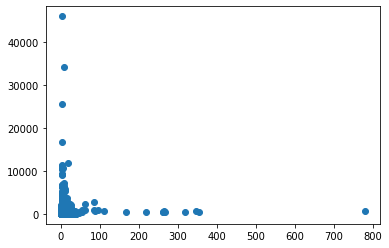

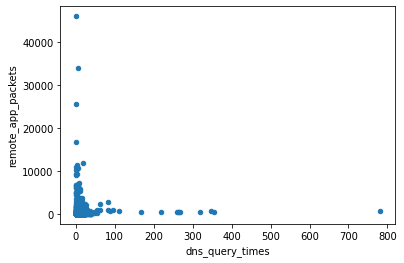

In [59]:
# find numeric analysis between dns query times and remote packets
plt.scatter(data.dns_query_times,data.remote_app_packets)
data.plot.scatter(x="dns_query_times",y="remote_app_packets")
plt.show()

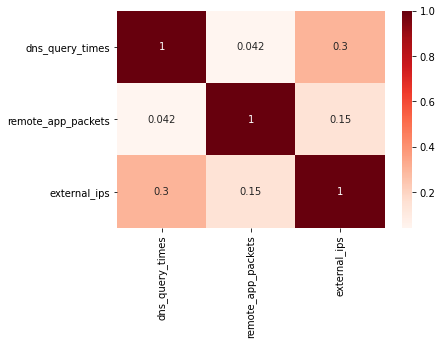

In [60]:
# correlation between dns and remote packets and external ips
data[['dns_query_times','remote_app_packets','external_ips']].corr()

sns.heatmap(data[['dns_query_times','remote_app_packets','external_ips']].corr(), annot=True, cmap='Reds')

plt.show()
